In [42]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import random as r
from datetime import datetime

#  Cross-Listed Stocks

**Name:** Kelly Wang

**Student Number:** 21016953


Completely dynamic code.

# Dynamic Code Values


In [7]:
def get_random_ticker():
   
    cross_listed_tickers = pd.read_csv('cross_listed_tickers.csv')
#   read in the list of tickers as a pandas dataframe

    range = len(cross_listed_tickers.index) - 1
#   get the range of the dataframe, which tells us the max value we can generate

    generated_index = r.randint(0, range)
#   generate random index    

    generated_ticker = cross_listed_tickers.iloc[generated_index, 0]
#   grab the generated ticker off of the dataframe using the integer location method
    return generated_ticker

In [8]:
ticker_str = get_random_ticker() #generate a random ticker

ticker_str = 'K.TO' #set a ticker

start_date = '2021-01-01' #freely modify the start and end dates within the 365 time frame
end_date = '2022-01-01'

# Creating a DataFrame

This was an asisgned ticker. There will also be information extracted from an external CSV file regarding foreign tickers and foreign stock exchanges. 


In [9]:
#read in csv
intercomps = pd.read_csv('interlisted-companies.csv')
#viewing the data
intercomps.head()

,Name,CAD Symbol,Local Market,US Symbol,International Market
0,Barrick Gold Corporation,ABX.TO,TOR,GOLD,NASDAQ
1,Aurora Cannabis Inc.,ACB.TO,TOR,ACB,NASDAQ
2,Agnico Eagle Mines Limited,AEM.TO,TOR,AEM,NASDAQ
3,Alamos Gold Inc.,AGI.TO,TOR,AGI,NASDAQ
4,Almaden Minerals Ltd.,AMM.TO,TOR,AAU,NASDAQ


In [62]:
#find the index for the given company by the ticker
index = intercomps.index[intercomps['CAD Symbol'] == ticker_str][0]
comp = yf.Ticker(ticker_str).info #get info for the particular ticker

#finding the domestic ticker in case it is different than the generated one or inputted one
domestic_ticker = intercomps.loc[index, 'CAD Symbol']

#create domestic exchange variable, will be used later in the dataframe
domestic_exchange = intercomps.loc[index, 'Local Market']
print(domestic_exchange) 

#extract the foreign ticker and foreign exchange
foreign_ticker = intercomps.loc[index,'US Symbol']
print(foreign_ticker)

foreign_exchange = intercomps.loc[index,'International Market']
print(foreign_exchange)


TOR
KGC
NASDAQ


In [63]:
#creating the dataframe for the ticker 
comp_data  = pd.DataFrame({'Company Name' : [comp['longName']],
            'Domestic Ticker' : [domestic_ticker],
            'Foreign Ticker' : [foreign_ticker],
            'Industry' : [comp['industry']],
            'Sector' : [comp['sector']],
            'Website' : [comp['website']],
            'Location': [(comp['city'] + ", " + comp['state'] + ", " + comp['country'])],
            'Domestic Stock Exchange' : [domestic_exchange],
            'Foreign Stock Exchange' : [foreign_exchange]})
#view data
comp_data


,Company Name,Domestic Ticker,Foreign Ticker,Industry,Sector,Website,Location,Domestic Stock Exchange,Foreign Stock Exchange
0,Kinross Gold Corporation,K.TO,KGC,Gold,Basic Materials,https://www.kinross.com,"Toronto, ON, Canada",TOR,NASDAQ


In [64]:
%%latex
\newpage


<IPython.core.display.Latex object>

## USING API
Finding exchange rates through using an Exchange Rate API. The data is shown from 2021-01-01 to 2022-01-01. The code also filters through the other data that is not within the time frame.

In [65]:
import requests
#for api requests 
req = {'start_date' : start_date,
        'end_date' : end_date,
        'base' : 'USD',
        'symbols' : ['CAD']}
reply = requests.get('https://api.exchangerate.host/timeseries', params=req) 

In [66]:
#from the reply json, copy data into this dataframe
exchange = pd.DataFrame(reply.json()['rates']).T 

#change the index
exchange.index = pd.to_datetime(exchange.index) 

exchange.rename(columns={'CAD': 'USDTOCAD'}, inplace=True) #rename column

exchange.head()

,USDTOCAD
2021-01-01,1.273005
2021-01-02,1.273005
2021-01-03,1.273320
2021-01-04,1.278366
2021-01-05,1.267445


In [67]:
%%latex
\newpage

<IPython.core.display.Latex object>

## PLOTTING
Closing stock price plots 

In [68]:
compUS = yf.Ticker(foreign_ticker)
compCAD = yf.Ticker(domestic_ticker)

#extract data from the domestic and foreign stock markets within the time frames
domestic = compCAD.history(start = start_date, end = end_date)
foreign = compUS.history(start = start_date, end = end_date)

#create new dataframe that includes the closing price of the two markets
close_price = pd.DataFrame( {'Domestic Market' : domestic.Close,
                            'Foreign Market' : foreign.Close})

#view data
close_price

,Domestic Market,Foreign Market
Date,,
2021-01-04,9.826323,7.672979
2021-01-05,9.605183,7.586442
2021-01-06,9.749404,7.701825
2021-01-07,9.557107,7.528750
2021-01-08,9.028294,7.096064
...,...,...
2021-12-27,NaN,5.436464
2021-12-28,NaN,5.485440
2021-12-29,7.052365,5.514827


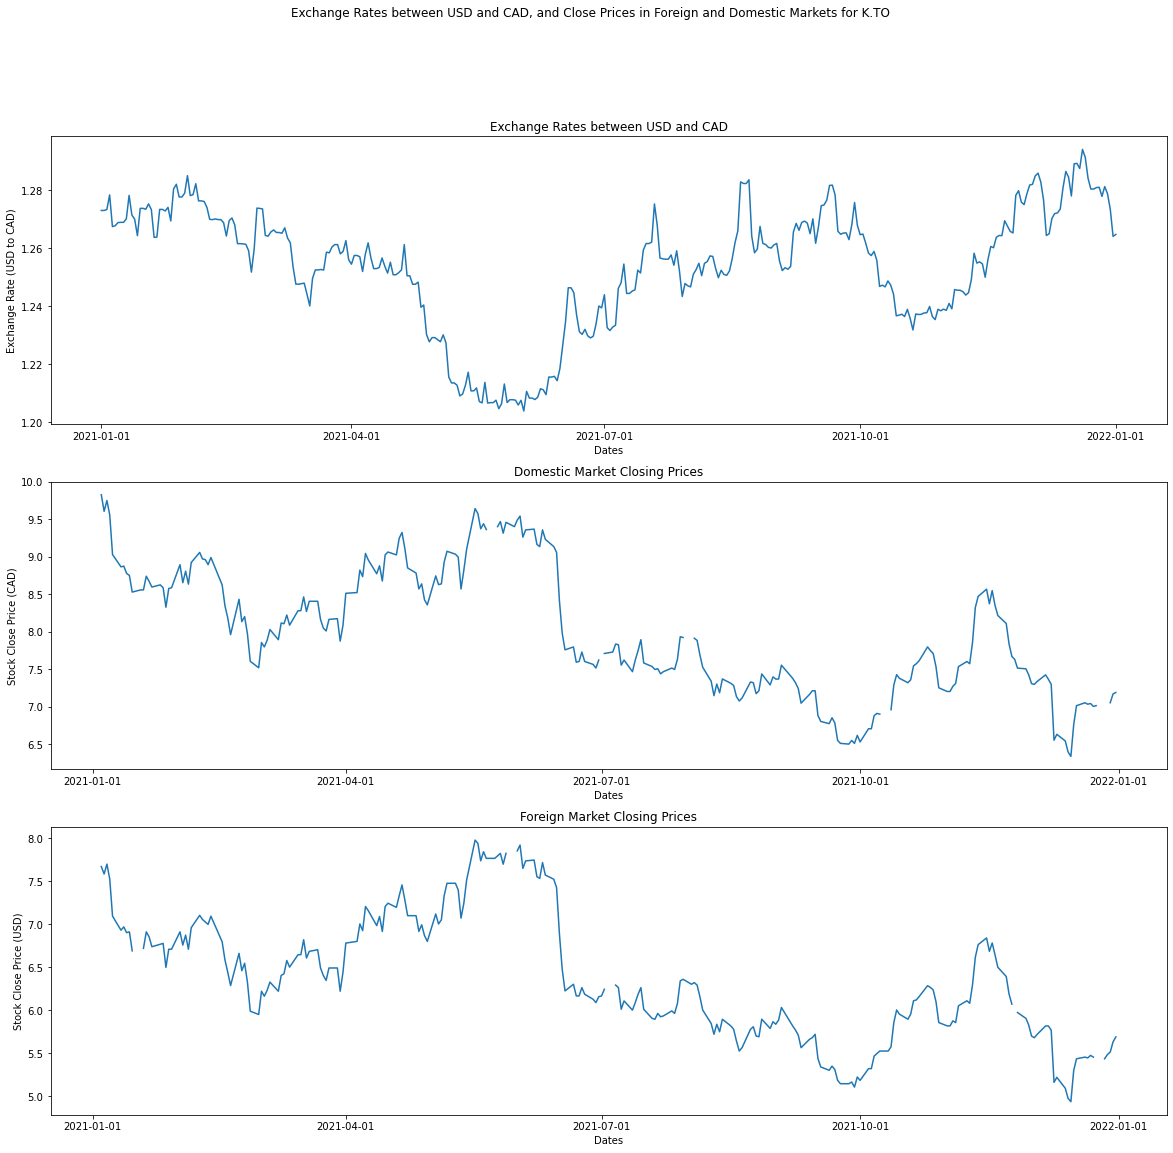

In [70]:
#creating a 3x1 subplot
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1)

#set size 
fig.set_size_inches(20, 18)

#title
fig.suptitle('Exchange Rates between USD and CAD, and Close Prices in Foreign and Domestic Markets for ' + domestic_ticker)

#subplots 
ax1.plot(exchange.index, exchange.USDTOCAD) #exchange rates
ax2.plot(close_price.index, close_price['Domestic Market'])
ax3.plot(close_price.index, close_price['Foreign Market'])

#labels 
ax1.set_ylabel("Exchange Rate (USD to CAD)")
ax2.set_ylabel("Stock Close Price (CAD)")
ax3.set_ylabel("Stock Close Price (USD)")

ax1.set_xlabel("Dates")
ax2.set_xlabel("Dates")
ax3.set_xlabel("Dates")

ax1.set_title("Exchange Rates between USD and CAD")
ax2.set_title("Domestic Market Closing Prices")
ax3.set_title("Foreign Market Closing Prices")

#setting tickers based on index 
ax1.set_xticks(['2021-01-01', '2021-04-01','2021-07-01','2021-10-01','2022-01-01'])
ax2.set_xticks(['2021-01-01', '2021-04-01','2021-07-01','2021-10-01','2022-01-01'])
ax3.set_xticks(['2021-01-01', '2021-04-01','2021-07-01','2021-10-01','2022-01-01'])

plt.show()

In [50]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Relationship between exchange rate graph and closing prices of both markets


When comparing the three plots, I notice that the plots of the two domestic and foriegn market closing prices of the stock follow very similar trends, if not nearly identical. Between the plots of the markets and the exchange rates, a rather general observation can be made. When the exchange rate is lower, the market price seemingly increases. The same can be seen for when the exchange rate increases and the market price dips.

In [50]:
%%latex
\newpage

<IPython.core.display.Latex object>



### Exchange rate conversion
Implied closing price is what we call the CAD stock prices that has been converted to USD stock prices with live exchange rates.


In [51]:
#create a new dataframe with the dates and the exchange rate
convert_price = pd.DataFrame({'Date' : exchange.index,
                             'Exchange Rate' : exchange.USDTOCAD})
convert_price.set_index('Date', inplace=True)
convert_price['CAD Close Price'] = domestic.Close

#implied closing price is close price / exchange rate
convert_price['USD Implied Close Price'] = (convert_price['CAD Close Price'] / convert_price['Exchange Rate'])
convert_price['USD Actual Close Price'] = foreign.Close
convert_price.dropna(inplace=True)

#print data
convert_price.head()

,Exchange Rate,CAD Close Price,USD Implied Close Price,USD Actual Close Price
Date,,,,
2021-01-04,1.278366,9.826322,7.686626,7.672979
2021-01-05,1.267445,9.605181,7.578381,7.586442
2021-01-06,1.267741,9.749405,7.690376,7.701825
2021-01-07,1.268822,9.557108,7.532268,7.528750
2021-01-08,1.268911,9.028295,7.114994,7.096064


In [52]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Average deviation between USD stock price and implied stock price


In [53]:
count = 0 #counter
dev = 0 #accumulator

#iterate through the rows in convert_price
for index, row in convert_price.iterrows():
    #finding the deviation within each day between the two
    dev += (row['USD Actual Close Price'] - row['USD Implied Close Price'])
    count+=1
#the average is the total deviation divided by the counter
avgdev = dev / count
print("The average deviation of the USD Stock price is $" + str(avgdev) + "USD.")

The average deviation of the USD Stock price is $0.0010191584527001426USD.


Since the average deviation of the USD stock price is around $0.001USD, it can be deduced the difference between the USD actual closing price and its implied closing price is very small. This shows that the implied closing price is a strong tool of estimation for the actual closing price. There will always exist some sort of deviation between the implied and actual closing price. This is since the stock market has a specific time (5PM) that it closes, while fluctuations in currency continues to occur throughout the day. Thus, the CAD price divided by the exchange rate will always slightly differ from the actual USD closing price.

In [54]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Plotting the deviation


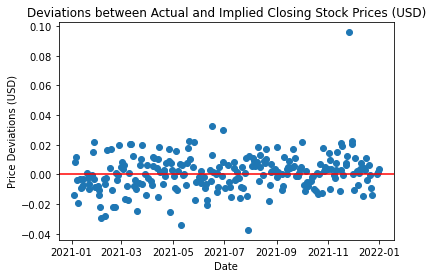

In [55]:
#add a new column, "Price Deviations" into convert_price
convert_price["Price Deviations"] = convert_price["USD Actual Close Price"] - convert_price["USD Implied Close Price"]

#create a scatter plot between the deviations and the dates
plt.scatter(convert_price.index, convert_price['Price Deviations'])

#adding titles, labels and a horizontal line where y=0 
plt.title("Deviations between Actual and Implied Closing Stock Prices (USD)")
plt.ylabel("Price Deviations (USD)")
plt.xlabel("Date")
plt.axhline(y=0, linestyle = "-", color = 'r')

plt.show()


In [56]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Conclusions about implied vs actual closing price


Form the observations made in warlier and the scatter plot, it can be concluded that deviations between the implied and actual closing price are very minute. In the scatter plot, majority of the dots are found surrounding the y=0 line, with few outliers. Thus, it can be concluded that generally, the implied closing price is a realtively accurate estimate of the actual closing price.

Overall, it can be concluded from analyzing the trends in the plots in the third question, that the changes in pricing within the two markets is due to any fluctuations in the exchange rate between the two countries. 

## Scenario: Selling shares in one year and how much money that would be made 

Imagine that you can simultaneously purchase and sell $10000$ shares of your stock on either side of the market every trading day during this 1 year period (profits cannot be compounded/reinvested). 

Calculate how much money in total you would make in USD.

In [57]:
#starting with 10000 shares 
start = 10000
profit = 0

#iterate through the rows in convert_price
for index, row in convert_price.iterrows():
    
    #if the deviations between the two prices are positive
    #this meands that actual > implied price
    if(row['Price Deviations'] > 0):
        
        #then, buy 10000 shares from the domestic market and sell on the foreign
        profit += (start*row['USD Actual Close Price']) - (start*row['USD Implied Close Price'])
        
    else: #otherwise
        
        #buy from the foreign market and sell on domestic
        profit += (start*row['USD Implied Close Price']) - (start*row['USD Actual Close Price'])

print("I would make $" + str(profit) + " from purchasing and selling 10000 shares of my stock.")

I would make $22213.156989074938 from purchasing and selling 10000 shares of my stock.


In [58]:
%%latex
\newpage

<IPython.core.display.Latex object>

### How would you make the most profit given the scenario:
Now imagine you were given \$1 million USD at the beginning of this one year period. Assume that there are no restrictions on selling, and assume that you can buy fractional shares.


I would be able to make the most profit by taking advantage of the price deviations between the implied close price and the actual close price. When the implied close price is greater than the actual close price, this suggests that the price in the foriegn market is less than the price in the domestic market. Thus, I would purchase as many KTO shares on the NASDAQ as I can, and then sell it on the TOR, within the same day. The same would be for vice versa. When the actual closing price is greater than the implied closing price, I would purchase as many shares on the TOR, and sell it on the NASDAQ. This would help generate the greatest amount of profit, given there aren't any restrictions. 

### Implementation of strategy



In [59]:
total = 1000000 #starting with 1 million USD

#iterate through each row in convert_price
for index, row in convert_price.iterrows():
    
    #when actual price > implied price
    if(row['Price Deviations'] > 0):
        
        #buy as many shares from the domestic market with the total money
        #and sell that many shares on the foreign market with the actual close price
        total = (total / row['USD Implied Close Price']) * (row['USD Actual Close Price'])
        
    else:#otherwise 
        
        #buy as many shares from the foreign market with the total money 
        #then sell that many shares on the domestic market 
        total = (total / row['USD Actual Close Price']) * (row['USD Implied Close Price'])

#calculate profit by taking the difference between the total compounded money and the original starting money
profit = total - 1000000

print("I would be able to make $" + str(profit) + "USD in profit." )
    

I would be able to make $417173.3719692305USD in profit.


In [60]:
%%latex
\newpage

<IPython.core.display.Latex object>